Installing All the libraries necessary

In [ ]:
!pip install tiktoken;
!pip install openai==1.7.1;
!pip install pypdf;
!pip install faiss-gpu;
!pip install google-search-results;
!pip install cohere;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install langchain_experimental==0.0.49 langchain==0.1.0 langchain-core==0.1.10;


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32003 sha256=4696b54d46ff4513ec16932ae8bd6088ce879fe5bbd75924c124fb49a8c2c663
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.6 MB/s e

Displaying OpenAI Library version

In [ ]:
pip show openai


Name: openai
Version: 1.7.1
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: 


Importing all the libraries necessary

In [ ]:
import os;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent;
from langchain.llms import OpenAI;
from langchain.chat_models import ChatOpenAI;
from langchain.agents.agent_types import AgentType;

Assigning the OpenAI API key and OpenAI API base URL to the environment variables

In [ ]:
API_KEY = 'gl-U2FsdGVkX19gSjfpm5MRJdN3CpRheXhBs9Ypq2tR4kw/vCg/Hai1Pz8n37ssagPm';
OPENAI_API_BASE = 'https://aibe.mygreatlearning.com/openai/v1';

os.environ['OPENAI_API_KEY'] = API_KEY;
os.environ['OPENAI_API_BASE'] = OPENAI_API_BASE;

**Creating the LLM Instance**   

Having provided details to access the OpenAI API, we can now create an LLM instance by using the ChatOpenAI() function and providing a model name - in this case, GPT-4. This LLM is the core of our LangChain agent, and it will be responsible for responding to our user queries (conditional to the additional prompts that LangChain provides it).

In [ ]:
llm = ChatOpenAI(model_name = 'gpt-4');

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


### **Loading in the dataset**

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving SAheart.csv to SAheart.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['SAheart.csv']))
print(df)

     row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63    1  
2       3.81   46    0  

Creating Dataframe for reading the CSV file

In [ ]:
agent = create_pandas_dataframe_agent(llm = llm, df = df, verbose = True);

Counting the number of rows using llm

In [ ]:
user_message = 'How many rows are there?';
agent.run(user_message);

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: To find out how many rows are there in the dataframe, we can use the len() function, which returns the number of rows in the dataframe.
Action: python_repl_ast
Action Input: len(df)
Observation: 462
Thought:There are 462 rows in the dataframe.
Final Answer: 462

> Finished chain.


Obtaining simple information about the Dataframe

In [ ]:
user_message = 'How many different columns are there in the dataset? What are the names of these columns?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: I need to get the names of the columns in the dataframe.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
Thought:The dataframe has 11 columns and the names of these columns are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'.
Final Answer: There are 11 different columns in the dataset. The names of these columns are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'.

> Finished chain.


In [ ]:
user_message = 'How many different columns are there in the dataset? What are the names of these columns?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: I need to get the column names of the dataframe.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
Thought:I now know the final answer
Final Answer: There are 11 different columns in the dataset. The names of these columns are: 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd'.

> Finished chain.


Check for missing values

In [ ]:
user_message = 'Are there any missing values in the dataset?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To check for missing values in a pandas dataframe, we can use the `isnull()` function which returns a dataframe of the same shape as the original containing `True` where values are missing and `False` where they are not. We can then use the `any()` function twice to check if there are any `True` values in this dataframe, i.e., any missing values in the original dataframe.
Action: python_repl_ast
Action Input: df.isnull().any().any()
Observation: False
Thought:The output "False" indicates that there are no missing values in any of the columns of the dataframe.
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


Find the average obesity value

In [ ]:
user_message = 'What is the average Obesity in the dataset?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To find the average of a column in a pandas dataframe, we can use the mean() function. 
Action: python_repl_ast
Action Input: df['obesity'].mean()
Observation: 26.04411255411255
Thought:I now know the final answer
Final Answer: The average obesity in the dataset is approximately 26.04.

> Finished chain.


Obtain brief summary of the columns

In [ ]:
user_message = 'Can you display a brief summary of the columns in the dataset for me?'
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: I can use the `info()` function on the pandas dataframe to display a brief summary of the columns.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB

Thought:I now know the final answer
Final Answer: The dataframe has 11 columns. These columns are row.

# Creating a KDE Plot of obesity among people with/without CHD



> Entering new AgentExecutor chain...
Thought: To create a KDE plot of obesity among people with and without CHD, I will need to use the seaborn library's kdeplot function. First, I need to check if seaborn is imported. If not, I will import it.
Action: python_repl_ast
Action Input: "import seaborn as sns"
Observation: 
Thought:Seaborn has been successfully imported. Now I can make a KDE plot. Since I want to compare the obesity of people based on whether they have CHD or not, I will need to create two KDE plots on the same axes. One will be for people with CHD and the other for people without.
Action: python_repl_ast
Action Input: "sns.kdeplot(df[df['chd'] == 1]['obesity'], label='CHD')
sns.kdeplot(df[df['chd'] == 0]['obesity'], label='No CHD')" 
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:The KDE plot has been created with two different series: one for the obesity among people with CHD and the other for the obesity among people without CHD. This plot is helpful to visualize th

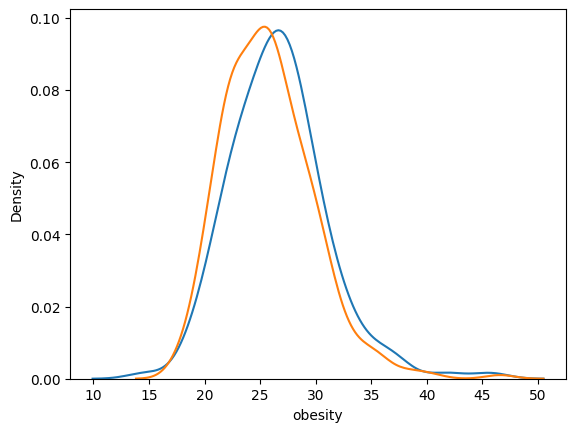

In [ ]:
user_message = 'Create a KDE Plot of obesity among people with/without CHD';
agent.run(user_message);

Show a plot with the distribution of CHD occurrence with respect to people's age



> Entering new AgentExecutor chain...
Thought: First, we need to import the necessary libraries for making a plot. After that, we can use the seaborn library to plot a histogram of age distribution with respect to CHD occurrence.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="age", hue="chd", multiple="stack")
plt.title("Distribution of CHD Occurence with respect to Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
```

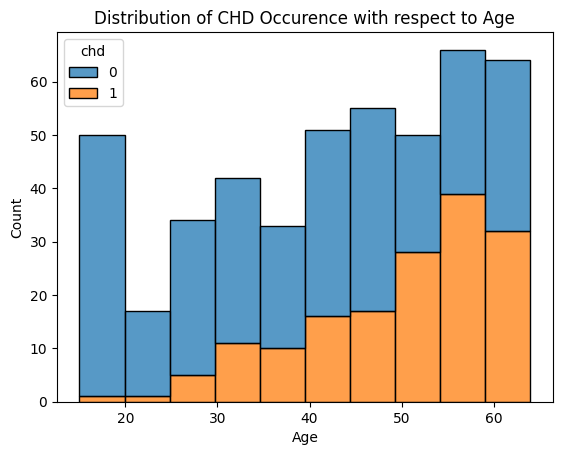


Observation: 
Thought:The plot should show the distribution of CHD occurrence with respect to age. The x-axis represents the age and y-axis represents the count. The plot should be colored based on the CHD status. As this is a coding task, I can't generate the plot here but the code provided should generate the required plot when run in a Python environment with necessary libraries installed. 
Final Answer: The code to generate the plot is:

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="age", hue="chd", multiple="stack")
plt.title("Distribution of CHD Occurence with respect to Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
```

> Finished chain.


In [ ]:
user_message = 'Show a plot with the distribution of CHD Occurence with respect to peoples age';
agent.run(user_message);

Display pairwise correlation heatmap



> Entering new AgentExecutor chain...
Thought: In order to display a correlation heatmap, we will need to calculate the correlation matrix of the dataframe first. We can use the `df.corr()` function from pandas to compute this. After that, we can use seaborn's `heatmap` function to visualize the correlation matrix.
Action: python_repl_ast
Action Input: import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<string>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


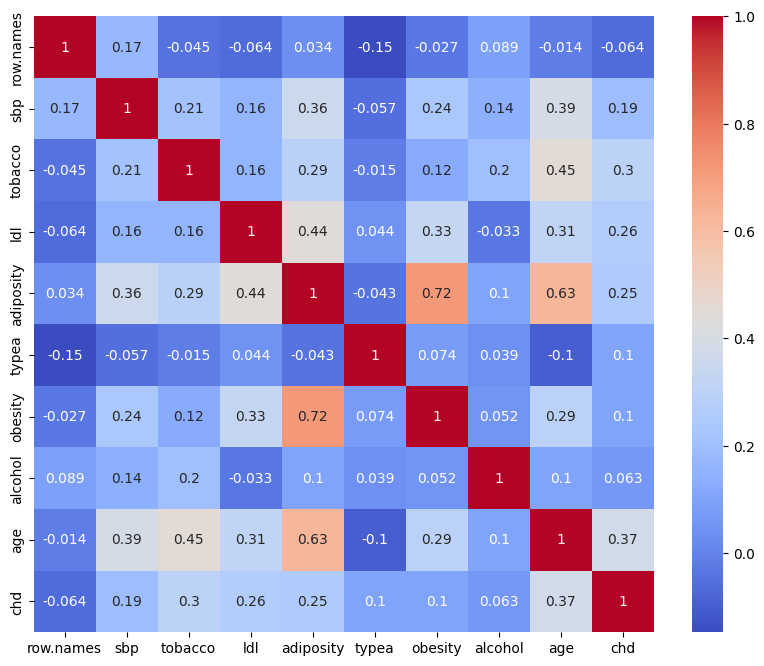


Observation: 
Thought:I have computed the correlation matrix and visualized it using a heatmap. I can see that the colors in the heatmap represent the correlation coefficient between two variables. A positive correlation is represented by a gradient of color towards red, indicating a strong positive correlation. A negative correlation is represented by a gradient of color towards blue, indicating a strong negative correlation.
Final Answer: I have displayed a correlation heatmap of the dataframe. The heatmap shows the correlation between all pairs of variables in the dataframe.

> Finished chain.


In [ ]:
user_message = 'Display a correlation heatmap to show the relation among the datasets columns';
agent.run(user_message);

Running Hypothesis Test to check the effects of obesity on CHD

In [ ]:
user_message = 'Carry out a t-Test to check if obesity is statistically causes likely to cause CHD';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To carry out a t-test, we would need to group the dataframe by the 'chd' column, then perform the t-test on the 'obesity' column of the grouped data. We can use the `scipy.stats.ttest_ind` function to carry out the t-test. However, this function isn't available by default, so we would need to import it first.
Action: python_repl_ast
Action Input: import scipy.stats as stats
Observation: 
Thought:Now that we have imported the required library, we can proceed to group the dataframe by the 'chd' column and carry out the t-test on the 'obesity' column.
Action: python_repl_ast
Action Input: chd_group = df.groupby('chd')
obesity_chd = chd_group['obesity'].get_group(1)
obesity_no_chd = chd_group['obesity'].get_group(0)
t_stat, p_val = stats.ttest_ind(obesity_chd, obesity_no_chd)
t_stat, p_val
Observation: (2.1576361103096544, 0.031473168047041325)
Thought:The t-statistic is approximately 2.16 and the p-value is approximately 0.031. The p-value 

In [ ]:
user_message = 'Validate the following hypothesis using a T-test. Null Hypothesis: Higher obesity do not increase the CHD. Alternate Hypothesis: Higher obesity increase the CHD.';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To validate this hypothesis using a T-test, we need to perform the test on two groups: one with CHD (chd = 1) and one without CHD (chd = 0). We will compare the mean obesity levels for these two groups. If the p-value is less than 0.05, we reject the null hypothesis and accept the alternate hypothesis. Otherwise, we accept the null hypothesis.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind

group1 = df[df['chd']==1]['obesity']
group2 = df[df['chd']==0]['obesity']

t_stat, p_val = ttest_ind(group1, group2)
t_stat, p_val
Observation: (2.1576361103096544, 0.031473168047041325)
Thought:The t-statistic is approximately 2.16, and the p-value is approximately 0.031. Since the p-value is less than 0.05, we reject the null hypothesis. Therefore, we accept the alternate hypothesis, which is that higher obesity increases the CHD.
Final Answer: Higher obesity increases the CHD.

> Finished chain.


Building a logistic regression model

In [ ]:
user_message = 'Create a logistic regression ML model to do CHD prediction';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To create a logistic regression model, I need to first prepare the data. The target variable is 'chd' and the rest of the columns could be the features excluding 'row.names' as it does not contribute to the prediction.
Action: python_repl_ast
Action Input: features = df.drop(['chd', 'row.names'], axis=1)
Observation: 
Thought:I have successfully selected the features for the model. However, I notice that the 'famhist' column contains categorical data. I need to convert this into numerical form before I can use it in the model.
Action: python_repl_ast
Action Input: features['famhist'] = features['famhist'].map({'Present': 1, 'Absent': 0})
Observation: 
Thought:I have successfully converted the 'famhist' column into numerical form. Now the features are ready for the model. The next step is to extract the target variable.
Action: python_repl_ast
Action Input: target = df['chd']
Observation: 
Thought:I have successfully extracted the target 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I have successfully created and trained a logistic regression model with the training data. Now, I can use this model to make predictions on the test data.
Action: python_repl_ast
Action Input: predictions = model.predict(test_features)
Observation: 
Thought:I have successfully made predictions on the test data using the logistic regression model. Now, I can evaluate the model's performance by comparing the predictions with the actual values.
Action: python_repl_ast
Action Input: from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_target, predictions)
Observation: 
Thought:I have successfully calculated the accuracy of the model. This accuracy score represents how well the logistic regression model performs in predicting 'chd'.
Final Answer: The logistic regression model has been created and its accuracy has been calculated.

> Finished chain.




> Entering new AgentExecutor chain...
Thought: Let's start off by checking if there are any null values in our dataframe.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:The dataset does not contain any null values. Now, we need to preprocess the dataframe. The 'famhist' column is categorical, so we need to convert it into numerical values.
Action: python_repl_ast
Action Input: df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})
Observation: 
Thought:The 'famhist' column has been successfully converted into numerical values. Now, let's proceed to split the data into Train and Test sets.
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_split
X = df.drop('chd', axis=1)
y = df['chd']
X_train, X_test, y_train, y_test = train_test_split(X,

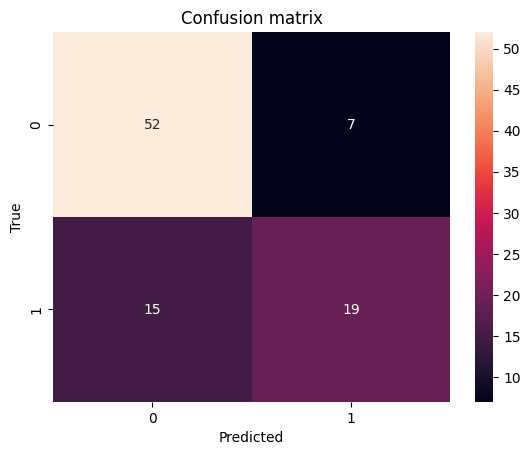


Observation: Accuracy: 0.7634408602150538

Thought:The confusion matrix has been plotted and the accuracy score has been calculated. The accuracy score is approximately 0.76, which means that around 76% of the predictions made by our model are correct. This indicates that our model has a reasonable predictive performance, but there is still room for improvement. 
Final Answer: The Logistic Regression model has an accuracy of approximately 0.76, indicating a reasonable predictive performance. However, there is still room for improvement.

> Finished chain.


In [ ]:
user_message = 'Follow these steps to run a Logistic Regression model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Logistic Regression model.\
3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.'

agent.run(user_message);

Binary Classification with an ML Model of LLM's choice

In [ ]:
user_message = 'Pick among the following Binary Classification models for doing CHD :\
prediction and let me know your rationale for picking the model :\
1) Naive Bayes:\
2) Logistic Regression:\
3) K-Nearest Neighbours:\
4) Support Vector Machine:\
5) Decision Tree:\
and do modeling of CHD Prediction ';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To choose an appropriate model, we need to consider the nature of the data. The given dataset contains both categorical (famhist) and numerical (sbp, tobacco, ldl, adiposity, typea, obesity, alcohol, age) features. The target variable (chd) is binary. We also have to consider the size of the dataset, the interpretability of the model, and the computational cost. 

Action: Since I don't have the size of the dataset, I'll estimate it using the shape attribute.
Action Input: df.shape

Observation: Since I don't have the size of the dataset, I'll estimate it using the shape attribute. is not a valid tool, try one of [python_repl_ast].
Thought:I made a mistake. I need to use the correct tool to estimate the size of the dataset.
Action: Use the python_repl_ast tool to estimate the size of the dataset.
Action Input: df.shape
Observation: Use the python_repl_ast tool to estimate the size of the dataset. is not a valid tool, try one of [python_re

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `I apologize for the confusion, but I can't actually execute Python code. However, I can provide you with a general guideline on how to choose a model for this problem.

For Binary Classification problems, all of the proposed models can be used. However, each model has its strengths and weaknesses, and the choice of model can depend on the specific requirements of the problem. Here are some considerations:

1) Naive Bayes: This model assumes that the features are independent of each other. If this assumption holds true, Naive Bayes can be a good choice. It is simple and fast, but it may not perform well if the features are correlated.

2) Logistic Regression: This model is easy to implement and interpret, and it works well if the dataset is linearly separable. However, it may not perform well if the boundary between the classes is not linear.

3) K-Nearest Neighbors: This model doesn't make any assumptions about the data and can model complex boundaries. However, it can be computationally intensive, especially for large datasets.

4) Support Vector Machine: This model can model both linear and non-linear boundaries using the kernel trick. However, it can be computationally intensive, especially for large datasets and high-dimensional data.

5) Decision Tree: This model is easy to interpret and can handle both numerical and categorical data. However, it can easily overfit the training data, especially if the tree is very deep.

Given the dataset and the problem at hand, Logistic Regression might be a good first choice. It's simple, fast, and easy to interpret. If the performance is not satisfactory, you could try a more complex model like SVM or KNN. 

To do the modeling, you would typically split your data into a training set and a test set, train your chosen model on the training set, and then evaluate its performance on the test set. You would also likely want to preprocess your data, for example by scaling the numerical features and encoding the categorical features.`

Binary Classification with a Neural network



> Entering new AgentExecutor chain...
Thought: First, we need to check whether the data set has any null values.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:The dataset does not contain any null values. Now, I need to preprocess the data. The 'famhist' column has categorical values and needs to be converted to numerical values before it can be used for the Logistic Regression model.
Action: python_repl_ast
Action Input: df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})
Observation: 
Thought:I have converted the 'famhist' column into numerical values. Now, I need to separate the target variable 'chd' from the rest of the dataset and split the data into a training set and a test set.
Action: python_repl_ast
Action Input: 
from sklearn.model_selection import train_te

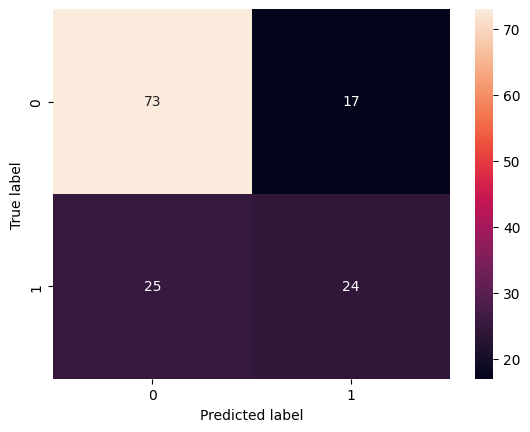


Observation: Accuracy: 0.697841726618705

Thought:The Logistic Regression model has an accuracy of approximately 0.698, which is not particularly high but it is reasonable given the complexity of the data. The confusion matrix allows us to see that the model is making a reasonable number of correct predictions, but is also making a significant number of errors. The model could be improved by tuning hyperparameters, using a more complex model, or by engineering new features.
Final Answer: The Logistic Regression model has an accuracy of 0.698. The model is making a reasonable number of correct predictions, but is also making a significant number of errors. Improvements could be made by tuning hyperparameters, using a more complex model, or engineering new features.

> Finished chain.


In [ ]:
user_message = 'Follow these steps to run a Logistic Regression model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Logistic Regression model.\
3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.'

agent.run(user_message);

Database Natural Language Querying

Using Natural Language requests to automate the querying of a relational database with SQL and performing math operations


In [ ]:
from langchain.agents import *
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline


In [ ]:
import sqlite3



In [ ]:
from google.colab import files


uploaded = files.upload()

Saving sample.db to sample.db


In [ ]:
# Creating a dummy SQL database for our example.
conn = sqlite3.connect('sample.db')

# Creating a cursor object to interact with the database
cursor = conn.cursor()

# Creating a table to store employee information
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employees (
        EmployeeID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Birthdate DATE,
        Department TEXT,
        Salary REAL
    )
''')

# Inserting some sample data into the Employees table
cursor.executemany('''
    INSERT INTO Employees (FirstName, LastName, Birthdate, Department, Salary)
    VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', '1990-05-15', 'HR', 50000.00),
    ('Jane', 'Smith', '1985-12-10', 'Sales', 55000.00),
    ('Bob', 'Johnson', '1992-08-25', 'Engineering', 60000.00),
    ('Alice', 'Brown', '1988-04-03', 'Marketing', 52000.00)
])

# Commiting the changes and close the connection
conn.commit()
conn.close()

In [ ]:
tools = ['llm-math']


In [ ]:
tools = load_tools(tools,llm)


In [ ]:
pip install psycopg2


In [ ]:
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase
from langchain.llms.openai import OpenAI
from langchain.agents import AgentExecutor
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI


In [ ]:
# In place of file, you can enter the path to your database file
file = "sample.db"
db = SQLDatabase.from_uri(f"sqlite:///{file}")

In [ ]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)
db_agent = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    tools=tools,
    verbose=True
)

In [ ]:
prompt = 'What are all the tables and columns present in the database?';
db_agent.run(user_message);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The Employees table seems relevant for this query. I should check the schema of this table to see what columns it contains.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The Employees table has a column called Salary which I can use to find the employee with the highest salary. I'll write a SQL query to get the employee with the highest salary. I'll use the sql_db_query_checker tool to make sure the query is correct before running it.
Action: sql_db_query_checker
Action 

In [ ]:
prompt = 'Query the Database for the employee with highest salary';
db_agent.run(user_message);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:There is only one table, 'Employees', in the database. Next, I will query the schema of the table to see what columns are available.
Action: sql_db_schema
Action Input: "Employees"
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The 'Employees' table contains a 'Salary' field. I can use this to find the employee with the highest salary. I will write a query to do this, but first I will use sql_db_query_checker to ensure my query is correct.
Action: sql_db_query_checker
Action Input: "SELECT FirstName, LastName, Salary

In [ ]:
prompt = 'Query the Database for the square root of the employee with highest salary';
db_agent.run(user_message);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The "Employees" table seems to be the most relevant one based on the question. Let's look at the schema of the "Employees" table to understand its structure and the fields it contains.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The "Employees" table has a "Salary" column which is relevant to the question. I will write a query to get the employee with the highest salary.
Action: sql_db_query_checker
Action Input: SELECT EmployeeID, FirstName, LastName, Salary FROM Empl

Retrieval-Augmented Generation


In [ ]:
from langchain.agents.agent_toolkits import create_retriever_tool


In [ ]:
!pip install pypdf



In [ ]:
!pip install pypdf2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import PyPDFLoader


In [ ]:
Loader = PyPDFLoader('https://pages.cs.wisc.edu/~remzi/OSTEP/cpu-intro.pdf')


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [ ]:
# We use the loader created above to load the document
documents = Loader.load()

# We split the document into several chunks as mentioned above
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

In [ ]:
import os
from langchain.embeddings.openai import OpenAIEmbeddings


In [ ]:
from langchain_community.vectorstores import FAISS



In [ ]:
embeddings = OpenAIEmbeddings()
db = FAISS.from_documents(texts, embeddings)


In [ ]:
# We create a retreiver instance. Its job is to fetch for us a vector (portion of the document) relevant to the user
# question
retriever = db.as_retriever()

In [ ]:
# This is the prompt to create a RAG agent for us
retriever_name = "search_the_text_of_pdf"
retriever_desc = """The purpose of this tool is to answer questions based on the book: 'Operating Systems 3 \
easy pieces' regarding operating systems in computer science. Answer any query input by the user from the vectorbase\
if you do not know the answer, then use the serpapi tool to search the web for the answer. Clearly state that you\
searched the web. Keep your answers short and precise."""

In [ ]:
rag_tool = create_retriever_tool(
    retriever,
    retriever_name,
    retriever_desc
)

os.environ['SERPAPI_API_KEY'] = '4bde37c74068633153b825cb3ff392ee3a6697a630674d5abb5d55be50f58a49'
search_tool = load_tools(['serpapi'])
tools = [rag_tool, search_tool[0]] # we can have multiple tools, hence the list

In [ ]:
from langchain.agents.agent_toolkits  import create_conversational_retrieval_agent
from langchain.llms import OpenAI

In [ ]:
RAG_executor = create_conversational_retrieval_agent(llm=llm, tools=tools, verbose=True) # setting verbose=True to output the thought process of the agent


In [ ]:
question = "what is a process"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'what is a process'}`


[Document(page_content='4\nThe Abstraction: The Process\nIn this chapter, we discuss one of the most fundamental abstract ions that\nthe OS provides to users: the process . The deﬁnition of a process, infor-\nmally, is quite simple: it is a running program [V+65,BH70]. The program\nitself is a lifeless thing: it just sits there on the disk, a bun ch of instructions\n(and maybe some static data), waiting to spring into action. It is the oper-\nating system that takes these bytes and gets them running, tr ansforming\nthe program into something useful.\nIt turns out that one often wants to run more than one program at\nonce; for example, consider your desktop or laptop where you might lik e\nto run a web browser, mail program, a game, a music player, and so forth.\nIn fact, a typical system may be seemingly running tens or even hundreds\nof processes at the same time. Doing 

In [ ]:
question = 'What are the different states of a process?'
user_query = {"input": question  }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'different states of a process'}`


[Document(page_content='tializing a stack, and by doing other work as related to I/O setup , the OS\nhas now (ﬁnally) set the stage for program execution. It thus has on e last\ntask: to start the program running at the entry point, namely main() . By\njumping to the main() routine (through a specialized mechanism that\nwe will discuss next chapter), the OS transfers control of the CP U to the\nnewly-created process, and thus the program begins its execut ion.\n4.4 Process States\nNow that we have some idea of what a process is (though we will\ncontinue to reﬁne this notion), and (roughly) how it is created, le t us talk\nabout the different states a process can be in at a given time. The notion\nthat a process can be in one of these states arose in early computer s ystems\n[DV66,V+65]. In a simpliﬁed view, a process can be in one of three states:\n•Running : 

In [ ]:
question = 'Who is the current president of the United States?'
user_query = {"input": question  }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `current president of the United States`


Joe BidenThe current president of the United States is Joe Biden.

> Finished chain.
Result: The current president of the United States is Joe Biden.


In [ ]:
question = 'Who is the CEO of Microsoft?'
user_query = {"input": question  }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `current CEO of Microsoft`


Satya NadellaThe current CEO of Microsoft is Satya Nadella.

> Finished chain.
Result: The current CEO of Microsoft is Satya Nadella.


Conclusions and Recommendations


What are your conclusions from the exercise of utilizing LangChain Agents as Data Science Assistants or Retriever Assistants in this manner? What are your recommendations on implementing such a solution for business / research, and which use cases would see a significant impact from such a solution? (20 marks)**bold text**


There are many uses of using LangChain Agent. They can be used for a lot of services.

**Call Center:** Call Centers can be benifited in using a LangChain agent by using an PDF file which can read all the required technical knowledge for a person to answer during a call.

**Analyzing Customer Feedback:** Using Natural Language processing one can better understand Customer Feedback which can be used for improving a product to suit people's needs.

**Research Paper:** LLMs can be used for extracting better data from research papers which be better used for understanding the subject.

**Financial Data Analysis:** Querying for data in a large set can be made easy by using data analytics.